In [1]:
# import libraries
import pandas as pd
from tabulate import tabulate as tb
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# read datasets
df1 = pd.read_csv('C:/Users/sahil/Downloads/pizza_order_details.csv')
df2 = pd.read_csv('C:/Users/sahil/Downloads/orders.csv')
df3 = pd.read_csv('C:/Users/sahil/Downloads/pizza_types.csv', encoding='Windows-1252')
df4 = pd.read_csv('C:/Users/sahil/Downloads/pizzas.csv')

In [3]:
# Join df1 with df2 on 'order_id'
merged_df = pd.merge(df1, df2, on='order_id', how='inner')

# Join merged_df with df4 on 'pizza_id'
merged_df = pd.merge(merged_df, df4, on='pizza_id', how='inner')

# Join merged_df with df3 on 'pizza_type_id'
merged_df = pd.merge(merged_df, df3, on='pizza_type_id', how='inner')
merged_df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,01-01-2023,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,01-01-2023,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,01-01-2023,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,01-01-2023,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,01-01-2023,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [4]:
# dataset information
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48633 entries, 0 to 48632
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48633 non-null  int64  
 1   order_id          48633 non-null  int64  
 2   pizza_id          48633 non-null  object 
 3   quantity          48633 non-null  int64  
 4   date              48633 non-null  object 
 5   time              48633 non-null  object 
 6   pizza_type_id     48633 non-null  object 
 7   size              48633 non-null  object 
 8   price             48633 non-null  float64
 9   name              48633 non-null  object 
 10  category          48633 non-null  object 
 11  ingredients       48633 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [4]:
# copy merged to df for further modification
df = merged_df.copy()
# chnage the dtype for time and date feature from object to datetime
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')
df['date'] = pd.to_datetime(df['date'], format='mixed')

In [5]:
# descriptive statistics
merged_df.describe()

,order_details_id,order_id,quantity,price
count,48633.000000,48633.000000,48633.000000,48633.000000
mean,24312.534945,10702.371168,1.019637,16.493693
std,14034.872611,6179.823933,0.143127,3.621661
min,1.000000,1.000000,1.000000,9.750000
25%,12159.000000,5339.000000,1.000000,12.750000
50%,24317.000000,10687.000000,1.000000,16.500000
75%,36465.000000,16100.000000,1.000000,20.250000
max,48620.000000,21350.000000,4.000000,35.950000


In [5]:
# make amount feature 
df['amount'] = df['quantity'] * df['price']
df.describe()

,order_details_id,order_id,quantity,date,time,price,amount
count,48633.000000,48633.000000,48633.000000,48633,48633,48633.000000,48633.000000
mean,24312.534945,10702.371168,1.019637,2023-06-28 22:09:38.718154496,1900-01-01 16:24:48.222174208,16.493693,16.821373
min,1.000000,1.000000,1.000000,2023-01-01 00:00:00,1900-01-01 09:52:21,9.750000,9.750000
25%,12159.000000,5339.000000,1.000000,2023-03-30 00:00:00,1900-01-01 13:24:41,12.750000,12.750000
50%,24317.000000,10687.000000,1.000000,2023-06-28 00:00:00,1900-01-01 16:33:31,16.500000,16.500000
75%,36465.000000,16100.000000,1.000000,2023-09-29 00:00:00,1900-01-01 18:55:14,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,2023-12-31 00:00:00,1900-01-01 23:05:52,35.950000,83.000000
std,14034.872611,6179.823933,0.143127,NaN,NaN,3.621661,4.438506


In [ ]:
# box plot for price and amount
num_col = df[['price', 'amount']]
df_melted = num_col.melt(var_name='Variable', value_name='Value')
px.box(df_melted, x='Variable', y='Value', title='Box Plots')

![example image](images/scatter_plot1.png)

In [8]:
# Total Orders of pizzas
print(f"Total Orders\n{df['order_id'].nunique()}")

Total Orders
21338


In [9]:
# total quantity sold
print(f"Total Pizzas Sold\n{df['quantity'].sum()}")

Total Pizzas Sold
49588


In [10]:
# total revenue
print(f"Revenue\n{df['amount'].sum()}")

Revenue
818073.85


In [11]:
# average daily quantity
daily_avg_qty = df.groupby('date')['quantity'].sum().reset_index()
print(f"Daily AVG Quantity\n{np.ceil(daily_avg_qty['quantity'].mean())}")

Daily AVG Quantity
139.0


In [12]:
# average order value
print(f"AVG Order Value\n{df['amount'].mean().round(2)}")

AVG Order Value
16.82


In [13]:
# most expensive and cheapest pizza name
print("Highest & Lowest Priced Pizza")
pd.concat([df[['name', 'size', 'price']].nlargest(1, 'price'),
df[['name', 'size', 'price']].nsmallest(1, 'price')], ignore_index=True)

Highest & Lowest Priced Pizza


,name,size,price
0,The Greek Pizza,XXL,35.95
1,The Pepperoni Pizza,S,9.75


In [14]:
# pivot table of Category including Revenue and Quantity
cate_pivot2 = df.pivot_table(values=['amount', 'quantity'],
                             index=['category', 'name'],
                             columns='size', 
                             aggfunc='sum')
cate_pivot2.fillna(0, inplace=True)
cate_pivot2.round(2).rename(columns={'amount':'Revenue', 'quantity':'Total Quantity'}).rename_axis(
    index={'category': 'Category', 'name': 'Pizza Name'})

Revenue            \
size                                                        L         M   
Category Pizza Name                                                       
Chicken  The Barbecue Chicken Pizza                  20584.00  16029.75   
         The California Chicken Pizza                19214.50  15828.75   
         The Chicken Alfredo Pizza                    3921.75  11758.50   
         The Chicken Pesto Pizza                      8279.25   4639.75   
         The Southwest Chicken Pizza                 21082.00   8961.25   
         The Thai Chicken Pizza                      29257.50   8073.50   
Classic  The Big Meat Pizza                              0.00      0.00   
         The Classic Deluxe Pizza                     9696.50  18896.00   
         The Greek Pizza                              5207.00   4480.00   
         The Hawaiian Pizza                          15163.50   6386.50   
         The Italian Capocollo Pizza                 14985.50   6464.00   
         The Napolitana Pizza                        11603.00   6832.00   
         The Pepperoni Pizza                         11102.00  11725.00   
         The Pepperoni, Mushroom, and Peppers Pizza   6720.00   5756.50   
Supreme  The Brie Carre Pizza                            0.00      0.00   
         The Calabrese Pizza                          5609.25   9132.50   
         The Italian Supreme Pizza                   15500.25  15543.00   
         The Pepper Salami Pizza                     14483.50   7045.50   
         The Prosciutto and Arugula Pizza             9026.25   9867.00   
         The Sicilian Pizza                          12413.25   9327.50   
         The Soppressata Pizza                        8403.75   4422.00   
         The Spicy Italian Pizza                     23053.25   6748.50   
         The Spinach Supreme Pizza                    5872.25   4405.50   
Veggie   The Five Cheese Pizza                       26066.50      0.00   
         The Four Cheese Pizza                       23640.15   8643.50   
         The Green Garden Pizza                       1923.75   4832.00   
         The Italian Vegetables Pizza                 3990.00   8123.75   
         The Mediterranean Pizza                      7492.50   4416.00   
         The Mexicana Pizza                          17556.75   7264.00   
         The Spinach Pesto Pizza                      5893.00   4653.00   
         The Spinach and Feta Pizza                   9011.25   8992.00   
         The Vegetables + Vegetables Pizza            8667.00  10160.00   

                                                                        \
size                                                        S       XL   
Category Pizza Name                                                      
Chicken  The Barbecue Chicken Pizza                   6171.00      0.0   
         The California Chicken Pizza                 6400.50      0.0   
         The Chicken Alfredo Pizza                    1224.00      0.0   
         The Chicken Pesto Pizza                      3812.25      0.0   
         The Southwest Chicken Pizza                  4679.25      0.0   
         The Thai Chicken Pizza                       6132.75      0.0   
Classic  The Big Meat Pizza                          22968.00      0.0   
         The Classic Deluxe Pizza                     9588.00      0.0   
         The Greek Pizza                              3648.00  14076.0   
         The Hawaiian Pizza                          10720.50      0.0   
         The Italian Capocollo Pizza                  3624.00      0.0   
         The Napolitana Pizza                         5664.00      0.0   
         The Pepperoni Pizza                          7322.25      0.0   
         The Pepperoni, Mushroom, and Peppers Pizza   6347.00      0.0   
Supreme  The Brie Carre Pizza                        11564.85      0.0   
         The Calabrese Pizza                          1212.75      0.0   
         The Italian S

In [ ]:
# Visualizing the above table using plolty 
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'pie'}, {'type': 'pie'}]],subplot_titles=("Category-wise contribution to Quantity",
                                                                                              "Category-wise contribution to Revenue"))
colors = ['mediumturquoise', 'gold', 'lightgreen', 'darkorange']

fig.add_trace(go.Pie(
values = cate_qty['QTY'],
labels = cate_qty['Category'],
# domain = dict(x=[0, 0.5]),
name = 'QTY'
),
row = 1, col = 1)
fig.add_trace(go.Pie(
values = cate_qty['Revenue'],
labels = cate_qty['Category'],
# domain = dict(x=[0.5, 1.0]),
name = 'Revenue'
),
row = 1, col = 2)
fig.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=1)))

![example image](images/pie_chart1.png)

In [ ]:
# Top 3 most sold pizzas in each Category
pizza_cate = df.groupby(['category', 'name'])['quantity'].sum().reset_index()
pizza_cate_rnk = pizza_cate.assign(rnk=pizza_cate.groupby('category')['quantity'].rank(ascending=False, method='dense'))
pizza_cate_rnk3 = pizza_cate_rnk[pizza_cate_rnk['rnk'].isin([1,2,3])]
px.bar(pizza_cate_rnk3, x='category', y='quantity', color='name', barmode='group', labels={'category':'Category', 'quantity':'Quantity'}
                                                                                             )

![example image](images/newplot.png)

In [ ]:
# Category wise Bar chart of revenue 
px.bar(cate_pivot, barmode='group', labels={'value':'Revenue','category':'Category'}, text='value')

![example image](images/newplot1.png)

In [16]:
# Total number of pizzas available in each sizes
df.groupby('size')['pizza_id'].nunique().reset_index(name='No of Pizzas')

,size,No of Pizzas
0,L,30
1,M,29
2,S,30
3,XL,1
4,XXL,1


In [17]:
# 5 most profitable pizzas by size
most_qty = (df.groupby(['size', 'name']).agg({'order_id':'count','quantity':'sum','amount':'sum'}).
            sort_values(by='quantity', ascending=False).reset_index())
most_qty.rename(columns={'size':'Size', 'name':'Name', 'order_id':'Orders', 'quantity':'QTY', 'amount':'Revenue'}, inplace=True)
most_qty.head()

,Size,Name,Orders,QTY,Revenue
0,S,The Big Meat Pizza,1811,1914,22968.00
1,L,The Thai Chicken Pizza,1365,1410,29257.50
2,L,The Five Cheese Pizza,1359,1409,26066.50
3,L,The Four Cheese Pizza,1274,1317,23640.15
4,M,The Classic Deluxe Pizza,1159,1181,18896.00


In [ ]:
# size wise contribution to Quantity and Revenue
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'pie'}, {'type': 'pie'}]],subplot_titles=("Size-wise contribution to Quantity",
                                                                                              "Size-wise contribution to Revenue"))
colors = ['mediumturquoise', 'gold', 'lightgreen', 'darkorange']

fig.add_trace(go.Pie(
values = size_oqr['QTY'],
labels = size_oqr['Size'],
# domain = dict(x=[0, 0.5]),
name = 'QTY'
),
row = 1, col = 1)
fig.add_trace(go.Pie(
values = size_oqr['Revenue'],
labels = size_oqr['Size'],
# domain = dict(x=[0.5, 1.0]),
name = 'Revenue'
),
row = 1, col = 2)
fig.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=1)), pull=[0.1,0,0,0,0.2])

![example image](images/newplot2.png)

In [ ]:
# top 3 pizza in each size by Revenue
pizza_size = df.groupby(['size', 'name'])['amount'].sum().round(2).reset_index()
pizza_size_rnk = pizza_size.assign(rnk=pizza_size.groupby('size')['amount'].rank(ascending=False, method='dense')) 
pizza_size_rnk3 = pizza_size_rnk[pizza_size_rnk['rnk'].isin([1,2,3])]
px.bar(pizza_size_rnk3, x='size', y='amount', color='name', barmode='group', labels={'size':'Size', 'amount':'Revenue'})

![example image](images/newplot3.png)

In [ ]:
# Size wise Revenue
px.bar(size_pivot, barmode='group', labels={'value':'Revenue','size':'Size'}, text='value')

![example image](images/newplot4.png)

In [ ]:
# Group by 'name' and sum 'quantity' and 'amount'
pizza_name = df.groupby('name')[['quantity', 'amount']].sum().reset_index()

# Rename columns
pizza_name.rename(columns={'name': 'Name', 'quantity': 'QTY', 'amount': 'Revenue'}, inplace=True)

# Sort by quantity in descending order
pizza_name_sorted = pizza_name.sort_values(by='QTY', ascending=False)

# Sum the last 10 pizzas by quantity and create a new entry 'Others'
others = pizza_name_sorted.tail(10)[['QTY']].sum()
others_row = pd.DataFrame({'Name': ['Others'], 'QTY': [others['QTY']]})

# Remove the last 10 rows and append the 'Others' row
pizza_name_sorted = pizza_name_sorted.head(len(pizza_name_sorted) - 10)
pizza_name_sorted = pizza_name_sorted._append(others_row, ignore_index=True)

px.pie(data_frame=pizza_name_sorted, names='Name', values='QTY',color_discrete_sequence=px.colors.sequential.Turbo,
       title='Quantity Sold by Pizza-Name',
       hole=0.6
      ).update_layout(margin=dict(l=150, r=10, t=50, b=10))

![example image](images/newplot5.png)

In [23]:
# days wise quantity distribution
df['date'].dt.day_name().value_counts().reset_index().rename(columns={'date': 'day', 'count': 'quantity'})

,day,quantity
0,Monday,7723
1,Tuesday,7277
2,Sunday,7243
3,Saturday,6907
4,Friday,6833
5,Thursday,6587
6,Wednesday,6063


In [6]:
# add month_name and hour features to df
df_month = df.assign(month_name=df['date'].dt.month_name())
df_month['hour'] = df_month['time'].dt.hour
df_month.head(2)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,amount,month_name,hour
0,1,1,hawaiian_m,1,2023-01-01,1900-01-01 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,January,11
1,2,2,classic_dlx_m,1,2023-01-01,1900-01-01 11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,January,11


In [ ]:
# filtering and grouping of respective columns
month_jan = (df_month.query('month_name == "January"').filter(['month_name', 'hour', 'quantity']).
             groupby('hour')['quantity'].sum().reset_index())

month_feb = (df_month.query('month_name == "February"').filter(['month_name', 'hour', 'quantity']).
             groupby('hour')['quantity'].sum().reset_index())

month_mar = (df_month.query('month_name == "March"').filter(['month_name', 'hour', 'quantity']).
             groupby('hour')['quantity'].sum().reset_index())
month_mar

# clubing the three months in one chart for comparison
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=month_jan['hour'], y=month_jan['quantity'], mode='lines+markers', name='Jan', marker=dict(symbol='circle', size=6))
)

fig.add_trace(
    go.Scatter(x=month_feb['hour'], y=month_feb['quantity'], mode='lines+markers', name='Feb', marker=dict(symbol='circle', size=6))
)

fig.add_trace(
    go.Scatter(x=month_mar['hour'], y=month_mar['quantity'], mode='lines+markers', name='Mar', marker=dict(symbol='circle-dot', size=6))
)

fig.update_xaxes(nticks=25)

fig.update_layout(height=600, width=1160, title_text="Time-Series Analysis",
                 xaxis_title='Hour',yaxis_title='Quantity',showlegend=True,
    legend=dict(
        title="Months",
        x=0.8,
        y=1,
        traceorder="normal"))

![example image](images/newplot6.png)

In [ ]:
# Quarter wise trend analysis
fig = go.Figure()

fig.add_trace(go.Scatter(x=qtr_1['hour'],y=qtr_1['quantity'],mode='lines+markers',name='Q1',marker=dict(symbol='circle',size=6)))
fig.add_trace(go.Scatter(x=qtr_2['hour'],y=qtr_2['quantity'],mode='lines+markers',name='Q2',marker=dict(symbol='circle',size=6)))
fig.add_trace(go.Scatter(x=qtr_3['hour'],y=qtr_3['quantity'],mode='lines+markers',name='Q3',marker=dict(symbol='circle',size=6)))
fig.add_trace(go.Scatter(x=qtr_4['hour'],y=qtr_4['quantity'],mode='lines+markers',name='Q4',marker=dict(symbol='circle',size=6)))

fig.update_xaxes(nticks=25)
fig.update_yaxes(nticks=20)
fig.update_layout(title_text='Quaterly Time-Series Analysis',height=700,width=1160,xaxis_title='Hour',yaxis_title='Quantity',showlegend=True,
                  legend=dict(title='Quarters',x=0.8,y=1))

![example image](images/newplot7.png)

In [7]:
# filtering dataframe
months_rev = df_month.groupby('month_name')['amount'].sum().reset_index()
months_rev.rename(columns={'month_name':'Months', 'amount':'Revenue'}, inplace=True)
months_rev['Months'] = pd.to_datetime(months_rev['Months'], format='%B').dt.strftime('%b-23')

In [ ]:
# Revenue line chart over the year
px.line(months_rev,'Months','Revenue',markers='circle',color_discrete_sequence=['limegreen'],title='Monthly Revenue')

![example image](images/newplot8.png)

In [ ]:
# Month on Month change
months_rev['pre_rev'] = months_rev['Revenue'].shift(1)
months_rev['MoM_change'] = ((months_rev['Revenue'] - months_rev['pre_rev']) / months_rev['pre_rev'] * 100).round(2)
months_rev.drop(columns=['pre_rev'], inplace=True)
months_rev.fillna({'MoM_change':0}, inplace=True)

# Line chart for Month on Month Change 
fig = px.line(months_rev, x='Months', y='MoM_change', text='MoM_change', markers='circle', title='Month on Month Change')
fig.update_traces(textposition='top right')
fig.update_layout(margin = dict(t=40, l=30, r=30, b=30))

![example image](images/newplot9.png)

In [27]:
# Three of the most negative and positive months over the year
print("Three Most Negative and Positive Months")
months_rev_rnk = months_rev.assign(rnk=months_rev['MoM_change'].rank(ascending=False)).sort_values(by='rnk')
pd.concat([months_rev_rnk.nlargest(3, 'rnk'),
months_rev_rnk.nsmallest(3, 'rnk')], ignore_index=True)

Three Most Negative and Positive Months


,Months,Revenue,MoM_change,rnk
0,Dec-23,61058.10,-12.14,12.0
1,Sep-23,63836.85,-6.33,11.0
2,May-23,67648.80,-5.13,10.0
3,Jan-23,71620.15,11.18,1.0
4,Feb-23,64419.45,5.51,2.0
5,Nov-23,71004.85,4.96,3.0


In [29]:
# pivot table by months
month_pivot = df_month.pivot_table(
    values='amount',
    columns='month_name',
    index='category',
    aggfunc='sum'
)
month_pivot.loc['total'] = month_pivot.sum(axis=0)
month_pivot

month_name,April,August,December,February,January,July,June,March,May,November,October,September
category,,,,,,,,,,,,
Chicken,17113.5,16579.50,14535.25,16273.25,16696.25,16758.5,16212.50,17055.75,16174.25,16472.25,15690.00,16489.25
Classic,19137.9,19003.45,16413.65,17209.10,19236.40,19102.2,18307.40,19106.60,18223.35,18303.85,18281.35,17656.60
Supreme,17566.9,17699.45,15289.60,16066.85,18324.85,18385.0,17690.35,17457.25,17761.65,18555.00,18146.20,15350.00
Veggie,16493.7,16214.90,14819.60,14870.25,17362.65,16810.9,15951.20,17686.50,15489.55,17673.75,16034.65,14341.00
total,70312.0,69497.30,61058.10,64419.45,71620.15,71056.6,68161.45,71306.10,67648.80,71004.85,68152.20,63836.85


In [8]:
df_month['week'] = df_month['date'].dt.strftime('%U')

In [9]:
# group amount by week
wow1 = df_month.groupby('week')['amount'].sum().reset_index(name='amount')

# Week on Week change
wow1['pre_rev'] = wow1['amount'].shift(1)
wow1['WoW_change'] = ((wow1['amount'] - wow1['pre_rev']) / wow1['pre_rev'] * 100).round(2)
wow1.drop(columns=['pre_rev'], inplace=True)
wow1.fillna({'WoW_change': 0}, inplace=True)
wow1.rename(columns={'amount': 'Revenue'}, inplace=True)
wow1.head(3)

,week,Revenue,WoW_change
0,01,17549.65,0.00
1,02,16635.90,-5.21
2,03,15445.50,-7.16


In [ ]:
sales = wow1['WoW_change']
months = wow1['week']

# Initialize the figure
fig = go.Figure()

# Loop through the data and plot segments with different colors
for i in range(1, len(sales)):
    color = 'green' if sales[i] > sales[i - 1] else 'red'
    
    # Plot each line segment between consecutive months
    fig.add_trace(go.Scatter(
        x=[months[i - 1], months[i]],
        y=[sales[i - 1], sales[i]],
        mode='lines',
        line=dict(color=color, width=4),
        showlegend=False
    ))

# Customize layout
fig.update_layout(
    title="Week on Week Change",
    xaxis_title="Month",
    yaxis_title="Sales",
    xaxis=dict(tickmode='array', tickvals=months),
    template='plotly_white'
)

# Show the plot
fig.show()

![example image](images/newplot10.png)

In [10]:
# Top 5 Negative weeks in a year
print("Five Lowest Weeks")
wow1.assign(rnk=wow1['WoW_change'].rank(ascending=True, method='dense')).sort_values(by='rnk')[:5].reset_index(drop=True)

Five Lowest Weeks


,week,Revenue,WoW_change,rnk
0,53,2916.00,-69.40,1.0
1,52,9528.15,-38.15,2.0
2,39,11556.95,-25.65,3.0
3,49,15567.05,-18.05,4.0
4,43,13152.70,-17.32,5.0


In [12]:
# add day feature to the df
df_month['day'] = df_month['date'].dt.day_name()

# day wise total quantity sold over the year
df_month.groupby('day')['quantity'].sum().reset_index()

,day,quantity
0,Friday,6981
1,Monday,7859
2,Saturday,7058
3,Sunday,7387
4,Thursday,6695
5,Tuesday,7411
6,Wednesday,6197


In [94]:
# Initialize a dictionary to hold the results for each day
daily_data = {}

# List of days to iterate over
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Loop through each day, filter, and group by hour
for day in days_order:
    daily_data[day] = df_month.query('day == @day').groupby('hour')['quantity'].sum().reset_index()

# Now, daily_data contains DataFrames for each day of the week
# For example, to access Monday's data:
# day_mon = daily_data['Monday']

In [ ]:
# Days time series analysis by quantity sold 
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=daily_data['Monday'].hour, y=daily_data['Monday'].quantity, mode='lines+markers', name='Mon',
               marker=dict(symbol='circle', size=6))
)

fig.add_trace(
    go.Scatter(x=daily_data['Tuesday'].hour, y=daily_data['Tuesday'].quantity, mode='lines+markers', name='Tue',
               marker=dict(symbol='circle', size=6))
)

fig.add_trace(
    go.Scatter(x=daily_data['Wednesday'].hour, y=daily_data['Wednesday'].quantity, mode='lines+markers', name='Wed',
               marker=dict(symbol='circle-dot', size=6))
)

fig.add_trace(
    go.Scatter(x=daily_data['Thursday'].hour, y=daily_data['Thursday'].quantity, mode='lines+markers', name='Thur',
               marker=dict(symbol='circle-dot', size=6))
)

fig.add_trace(
    go.Scatter(x=daily_data['Friday'].hour, y=daily_data['Friday'].quantity, mode='lines+markers', name='Fri',
               marker=dict(symbol='circle-dot', size=6))
)

fig.add_trace(
    go.Scatter(x=daily_data['Saturday'].hour, y=daily_data['Saturday'].quantity, mode='lines+markers', name='Sat',
               marker=dict(symbol='circle-dot', size=6))
)

fig.add_trace(
    go.Scatter(x=daily_data['Sunday'].hour, y=daily_data['Sunday'].quantity, mode='lines+markers', name='Sun',
               marker=dict(symbol='circle-dot', size=6))
)

fig.update_xaxes(nticks=25)

fig.update_layout(height=600, width=1160, title_text="Sales by Days over Time",
                 xaxis_title='Hour',yaxis_title='Quantity',showlegend=True,
    legend=dict(
        title="Days",
        x=0.8,
        y=1,
        traceorder="normal"))

![example image](images/newplot11.png)

In [14]:
# filter and group columns
cate_chicken = df_month.query('category == "Chicken"').groupby('hour')['quantity'].sum().reset_index()
cate_classic = df_month.query('category == "Classic"').groupby('hour')['quantity'].sum().reset_index()
cate_supreme = df_month.query('category == "Supreme"').groupby('hour')['quantity'].sum().reset_index()
cate_veggie = df_month.query('category == "Veggie"').groupby('hour')['quantity'].sum().reset_index()

In [ ]:
# category wise time series analysis
fig = go.Figure()
colors = ['darkorange', 'mediumturquoise', 'gold', 'lightgreen']


fig.add_trace(
    go.Scatter(x=cate_chicken['hour'], y=cate_chicken['quantity'], mode='lines+markers', name='Chicken', marker=dict(symbol='circle', size=6),
              line=dict(color=colors[0]))
)

fig.add_trace(
    go.Scatter(x=cate_classic['hour'], y=cate_classic['quantity'], mode='lines+markers', name='Classic', marker=dict(symbol='circle', size=6),
              line=dict(color=colors[1]))
)

fig.add_trace(
    go.Scatter(x=cate_supreme['hour'], y=cate_supreme['quantity'], mode='lines+markers', name='Supreme', marker=dict(symbol='circle-dot', size=6),
              line=dict(color=colors[2]))
)

fig.add_trace(
    go.Scatter(x=cate_veggie['hour'], y=cate_veggie['quantity'], mode='lines+markers', name='Veggie', marker=dict(symbol='circle-dot', size=6),
              line=dict(color=colors[3]))
)

fig.update_xaxes(nticks=25)

fig.update_layout(height=600, width=1160, title_text="Sales by Category over Time",
                 xaxis_title='Hour',yaxis_title='Quantity',showlegend=True,
    legend=dict(
        title="Category",
        x=0.8,
        y=1,
        traceorder="normal"))

![example image](images/newplot12.png)

In [20]:
# Filter and group columns
cate_chicken2 = df_month.query('category == "Chicken"').groupby('day')['quantity'].sum().reset_index()
cate_classic2 = df_month.query('category == "Classic"').groupby('day')['quantity'].sum().reset_index()
cate_supreme2 = df_month.query('category == "Supreme"').groupby('day')['quantity'].sum().reset_index()
cate_veggie2 = df_month.query('category == "Veggie"').groupby('day')['quantity'].sum().reset_index()

# Define the custom order for days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_type = pd.CategoricalDtype(categories=days_order, ordered=True)

# Function to convert and sort DataFrame
def convert_and_sort(df):
    df['day'] = df['day'].astype(days_type)
    return df.sort_values('day').reset_index(drop=True)

# Apply the function to each DataFrame
cate_chicken2 = convert_and_sort(cate_chicken2)
cate_classic2 = convert_and_sort(cate_classic2)
cate_supreme2 = convert_and_sort(cate_supreme2)
cate_veggie2 = convert_and_sort(cate_veggie2)

In [ ]:
# Category wise time series analysis by days
fig = go.Figure()
colors = ['darkorange', 'mediumturquoise', 'gold', 'lightgreen']


fig.add_trace(
    go.Scatter(x=cate_chicken2['day'], y=cate_chicken2['quantity'], mode='lines+markers', name='Chicken', marker=dict(symbol='circle', size=6),
               line=dict(color=colors[0]))
)

fig.add_trace(
    go.Scatter(x=cate_classic2['day'], y=cate_classic2['quantity'], mode='lines+markers', name='Classic', marker=dict(symbol='circle', size=6),
               line=dict(color=colors[1]))
)

fig.add_trace(
    go.Scatter(x=cate_supreme2['day'], y=cate_supreme2['quantity'], mode='lines+markers', name='Supreme', marker=dict(symbol='circle-dot', size=6),
               line=dict(color=colors[2]))
)

fig.add_trace(
    go.Scatter(x=cate_veggie2['day'], y=cate_veggie2['quantity'], mode='lines+markers', name='Veggie', marker=dict(symbol='circle-dot', size=6),
               line=dict(color=colors[3]))
)

# fig.update_xaxes(nticks=25)

fig.update_layout(height=600, width=1160, title_text="Sales by Category over Days",
                 xaxis_title='Day',yaxis_title='Quantity',showlegend=True,
    legend=dict(
        title="Category",
        x=0.3,
        y=1,
        traceorder="normal", orientation='h'))

![example image](images/newplot13.png)

In [124]:
size_data = {}

size_order = ['S', 'M', 'L', 'XL', 'XXL']

for size in size_order:
    size_data[size] = df_month.query('size == @size').groupby('hour')['quantity'].sum().reset_index()

In [ ]:
# Size wise time series analysis by days
fig = go.Figure()
colors = ['darkorange', 'mediumturquoise', 'gold', 'lightgreen', 'pink']


fig.add_trace(
    go.Scatter(x=size_data['S'].hour, y=size_data['S'].quantity, mode='lines+markers', name='S', marker=dict(symbol='circle', size=6),
               line=dict(color=colors[0]))
)

fig.add_trace(
    go.Scatterx=size_data['M'].hour, y=size_data['M'].quantity, mode='lines+markers', name='M', marker=dict(symbol='circle', size=6),
               line=dict(color=colors[1]))
)

fig.add_trace(
    go.Scatter(x=size_data['L'].hour, y=size_data['L'].quantity, mode='lines+markers', name='L', marker=dict(symbol='circle-dot', size=6),
               line=dict(color=colors[2]))
)

fig.add_trace(
    go.Scatter(x=size_data['XL'].hour, y=size_data['XL'].quantity, mode='lines+markers', name='XL', marker=dict(symbol='circle-dot', size=6),
               line=dict(color=colors[3]))
)

fig.add_trace(
    go.Scatter(x=size_data['XXL'].hour, y=size_data['XXL'].quantity, mode='lines+markers', name='XXL', marker=dict(symbol='circle-dot', size=6),
               line=dict(color=colors[4]))
)

# fig.update_xaxes(nticks=25)

fig.update_layout(height=600, width=1160, title_text="Sales by Size over Time",
                 xaxis_title='Day',yaxis_title='Quantity',showlegend=True,
    legend=dict(
        title="Size",
        orientation='h',
        x=0.5,
        y=1,
        traceorder="normal"))

![example image](images/newplot14.png)

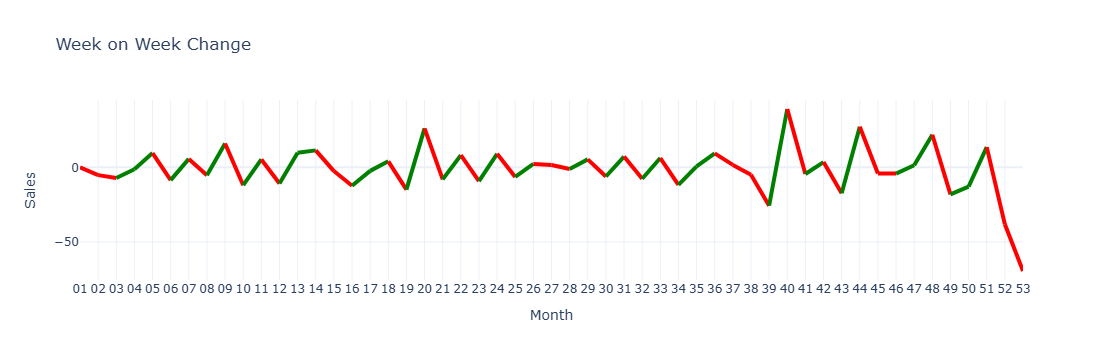

In [136]:
sales = wow1['WoW_change']
months = wow1['week']

# Initialize the figure
fig = go.Figure()

# Loop through the data and plot segments with different colors
for i in range(1, len(sales)):
    color = 'green' if sales[i] > sales[i - 1] else 'red'
    
    # Plot each line segment between consecutive months
    fig.add_trace(go.Scatter(
        x=[months[i - 1], months[i]],
        y=[sales[i - 1], sales[i]],
        mode='lines',
        line=dict(color=color, width=4),
        showlegend=False
    ))

# Customize layout
fig.update_layout(
    title="Week on Week Change",
    xaxis_title="Month",
    yaxis_title="Sales",
    xaxis=dict(tickmode='array', tickvals=months),
    template='plotly_white'
)

# Show the plot
fig.show()